In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/upfalldataset/CompleteDataSet (1).csv
/kaggle/input/features2/CompleteDataSetFeatures21_edited.csv


In [37]:
import pandas as pd

In [38]:

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding,Input
from keras.layers import Conv1D, MaxPooling1D,BatchNormalization,Flatten
from keras.layers import LSTM
from keras.layers import Reshape
from keras.layers import TimeDistributed
from keras.regularizers import l2
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.callbacks import History 

In [39]:
df=pd.read_csv("/kaggle/input/features2/CompleteDataSetFeatures21_edited.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (123,375,501,627,681,717,735) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [40]:
df2=df.apply(pd.to_numeric,errors='coerce')
# df2=df2.fillna(0)

In [41]:
target=df2['Activity'].drop(0)
target=pd.get_dummies(target)
print(target)

       1   2   3   4   5   6   7   8   9   10  11
1       1   0   0   0   0   0   0   0   0   0   0
2       1   0   0   0   0   0   0   0   0   0   0
3       1   0   0   0   0   0   0   0   0   0   0
4       1   0   0   0   0   0   0   0   0   0   0
5       1   0   0   0   0   0   0   0   0   0   0
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
15587   0   0   0   0   0   0   0   0   0   0   1
15588   0   0   0   0   0   0   0   0   0   0   1
15589   0   0   0   0   0   0   0   0   0   0   1
15590   0   0   0   0   0   0   0   0   0   0   1
15591   0   0   0   0   0   0   0   0   0   0   1

[15591 rows x 11 columns]


In [42]:
#df2['TimeStamps']=pd.to_datetime(df2['TimeStamps'])
df2['Timestamp']=pd.to_datetime(df2['Timestamp'])

In [43]:
df2.columns

Index(['Timestamp', 'AnkleAccelerometer:x-axis(g)Mean',
       'AnkleAccelerometer:x-axis(g)StandardDeviation',
       'AnkleAccelerometer:x-axis(g)RootMeanSquare',
       'AnkleAccelerometer:x-axis(g)MaximalAmplitude',
       'AnkleAccelerometer:x-axis(g)MinimalAmplitude',
       'AnkleAccelerometer:x-axis(g)Median',
       'AnkleAccelerometer:x-axis(g)Numberofzero-crossing',
       'AnkleAccelerometer:x-axis(g)Skewness',
       'AnkleAccelerometer:x-axis(g)Kurtosis',
       ...
       'Infrared6MeanFrequency', 'Infrared6MedianFrequency',
       'Infrared6Entropy', 'Infrared6Energy', 'Infrared6PrincipalFrequency',
       'Infrared6SpectralCentroid', 'Subject', 'Activity', 'Trial', 'Tag'],
      dtype='object', length=761)

In [44]:
df2=df2.fillna(0)
#features_considered=['xaa','yaa','zaa','xav','yav','zav','aal','xrp','yrp','zrp','xrv','yrv','zrv','rpl',
#   'xba','yba','zba','bal','xna','yna','zna','xnv','ynv','znv','nal','xwa','ywa','zwa','xwv','ywv','zwv','brsensor']
# features_considered=[ 'AnkleAccelerometer', 'Unnamed: 2', 'Unnamed: 3',
#        'AnkleAngularVelocity', 'Unnamed: 5', 'Unnamed: 6', 'AnkleLuminosity',
#        'RightPocketAccelerometer', 'Unnamed: 9', 'Unnamed: 10',
#        'RightPocketAngularVelocity', 'Unnamed: 12', 'Unnamed: 13',
#        'RightPocketLuminosity', 'BeltAccelerometer', 'Unnamed: 16',
#        'Unnamed: 17', 'BeltAngularVelocity', 'Unnamed: 19', 'Unnamed: 20',
#        'BeltLuminosity', 'NeckAccelerometer', 'Unnamed: 23', 'Unnamed: 24',
#        'NeckAngularVelocity', 'Unnamed: 26', 'Unnamed: 27', 'NeckLuminosity',
#        'WristAccelerometer', 'Unnamed: 30', 'Unnamed: 31',
#        'WristAngularVelocity', 'Unnamed: 33', 'Unnamed: 34', 'WristLuminosity',
#        'BrainSensor']
features=df2.drop(['Timestamp','Subject','Activity', 'Trial', 'Tag'],axis=1)
#features=df2.drop(['TimeStamps','Subject','Activity', 'Trial', 'Tag'],axis=1)
features=features.drop(0)
#features.index=df2['TimeStamps'].drop(0)
features.index=df2['Timestamp'].drop(0)

features.head()


,AnkleAccelerometer:x-axis(g)Mean,AnkleAccelerometer:x-axis(g)StandardDeviation,AnkleAccelerometer:x-axis(g)RootMeanSquare,AnkleAccelerometer:x-axis(g)MaximalAmplitude,AnkleAccelerometer:x-axis(g)MinimalAmplitude,AnkleAccelerometer:x-axis(g)Median,AnkleAccelerometer:x-axis(g)Numberofzero-crossing,AnkleAccelerometer:x-axis(g)Skewness,AnkleAccelerometer:x-axis(g)Kurtosis,AnkleAccelerometer:x-axis(g)FirstQuartile,...,Infrared6Kurtosis,Infrared6FirstQuartile,Infrared6ThirdQuartile,Infrared6Autocorrelation,Infrared6MeanFrequency,Infrared6MedianFrequency,Infrared6Entropy,Infrared6Energy,Infrared6PrincipalFrequency,Infrared6SpectralCentroid
Timestamp,,,,,,,,,,,,,,,,,,,,,
0,-1.013500,0.009776,6.332566,1.049,1.005,-1.010,0,-2.498906,6.337455,-1.0140,...,-3.000000,1.0,1.0,19,9.620000e-15,0.495010,1.020000e-13,1444,0.000000,1.840000e-14
0,-0.996514,0.169995,6.216204,1.188,0.063,-1.020,0,4.533313,21.786903,-1.0560,...,-1.612179,0.0,1.0,6,1.647202e+00,1.537892,2.456822e+00,732,0.000000,3.159544e+00
0,-0.557385,0.777842,5.718642,1.792,0.063,-1.012,2,0.831499,0.177364,-1.0585,...,1.681818,0.0,0.0,0,2.531067e+00,4.028358,3.051705e+00,135,0.000000,4.849739e+00
0,-0.142128,0.653787,2.795500,1.792,0.032,-0.050,4,-0.374183,1.759218,-0.2955,...,-3.000000,0.0,0.0,0,0.000000e+00,0.000000,0.000000e+00,0,9.459796,0.000000e+00
0,-0.185385,0.148017,0.351446,0.525,0.032,-0.176,2,0.286212,-0.327846,-0.2835,...,-3.000000,0.0,0.0,0,0.000000e+00,0.000000,0.000000e+00,0,9.331059,0.000000e+00


In [45]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15591 entries, 0 to 0
Columns: 756 entries, AnkleAccelerometer:x-axis(g)Mean to Infrared6SpectralCentroid
dtypes: float64(698), int64(58)
memory usage: 90.0 MB


In [46]:
#features.plot(subplots=True)

In [48]:
from sklearn.preprocessing import MinMaxScaler
# normalize the dataset
dataset=features
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [49]:
dataset

array([[1.87559715e-01, 8.26006295e-03, 3.06714000e-01, ...,
        8.18594104e-01, 0.00000000e+00, 1.87084651e-15],
       [1.93717218e-01, 1.46843500e-01, 3.01078072e-01, ...,
        4.14965986e-01, 0.00000000e+00, 3.21251184e-01],
       [3.52898929e-01, 6.72606161e-01, 2.76978945e-01, ...,
        7.65306122e-02, 0.00000000e+00, 4.93104174e-01],
       ...,
       [6.44689484e-01, 2.06657958e-03, 1.80587407e-02, ...,
        7.76077098e-01, 0.00000000e+00, 4.38225461e-16],
       [6.44634783e-01, 3.32011187e-03, 1.77941370e-02, ...,
        7.34693878e-01, 0.00000000e+00, 0.00000000e+00],
       [6.44453536e-01, 4.13101147e-03, 1.77247789e-02, ...,
        7.34693878e-01, 0.00000000e+00, 0.00000000e+00]])

In [50]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
xtrain, xtest = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(xtrain)
#xtest=np.expand_dims(xtest,axis=2)
print(xtest.shape)
print(xtrain.shape)

[[1.87559715e-01 8.26006295e-03 3.06714000e-01 ... 8.18594104e-01
  0.00000000e+00 1.87084651e-15]
 [1.93717218e-01 1.46843500e-01 3.01078072e-01 ... 4.14965986e-01
  0.00000000e+00 3.21251184e-01]
 [3.52898929e-01 6.72606161e-01 2.76978945e-01 ... 7.65306122e-02
  0.00000000e+00 4.93104174e-01]
 ...
 [3.81768610e-01 9.43362972e-04 6.54001684e-02 ... 6.94444444e-01
  0.00000000e+00 3.21297554e-16]
 [3.81704788e-01 1.15908476e-03 6.72925737e-02 ... 7.76077098e-01
  0.00000000e+00 4.52460162e-16]
 [3.81685194e-01 1.63083457e-03 6.73083873e-02 ... 7.76077098e-01
  0.00000000e+00 4.45342812e-16]]
(4678, 756)
(10913, 756)


In [51]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8,\
                   palette="Set1")
        #markers=['^','v','s','o', '1','2','3','4','+','6','7']
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


In [53]:
df1=df.drop(0)
df1=df1.dropna()
xt=df1.drop(['Timestamp','Subject','Activity', 'Trial', 'Tag'],axis=1)
yt=df1.Activity


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 4391 samples in 0.374s...
[t-SNE] Computed neighbors for 4391 samples in 2.682s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4391
[t-SNE] Computed conditional probabilities for sample 2000 / 4391
[t-SNE] Computed conditional probabilities for sample 3000 / 4391
[t-SNE] Computed conditional probabilities for sample 4000 / 4391
[t-SNE] Computed conditional probabilities for sample 4391 / 4391
[t-SNE] Mean sigma: 14082607.942329
[t-SNE] Computed conditional probabilities in 0.064s
[t-SNE] Iteration 50: error = 117.4502106, gradient norm = 0.0922907 (50 iterations in 1.366s)
[t-SNE] Iteration 100: error = 99.0701065, gradient norm = 0.0519860 (50 iterations in 0.924s)
[t-SNE] Iteration 150: error = 92.8731537, gradient norm = 0.0437456 (50 iterations in 0.861s)
[t-SNE] Iteration 200: error = 89.0910339, gradient norm = 0.0359110 (50 iterations in 0.

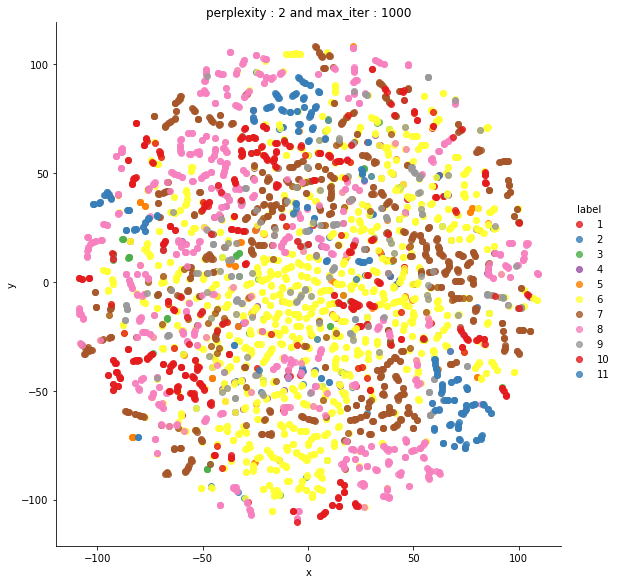

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 4391 samples in 0.385s...
[t-SNE] Computed neighbors for 4391 samples in 3.369s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4391
[t-SNE] Computed conditional probabilities for sample 2000 / 4391
[t-SNE] Computed conditional probabilities for sample 3000 / 4391
[t-SNE] Computed conditional probabilities for sample 4000 / 4391
[t-SNE] Computed conditional probabilities for sample 4391 / 4391
[t-SNE] Mean sigma: 20469108.297380
[t-SNE] Computed conditional probabilities in 0.135s
[t-SNE] Iteration 50: error = 106.4266357, gradient norm = 0.0676390 (50 iterations in 1.420s)
[t-SNE] Iteration 100: error = 88.8558273, gradient norm = 0.0310127 (50 iterations in 0.918s)
[t-SNE] Iteration 150: error = 83.8580475, gradient norm = 0.0218128 (50 iterations in 0.872s)
[t-SNE] Iteration 200: error = 80.9018555, gradient norm = 0.0168103 (50 iterations

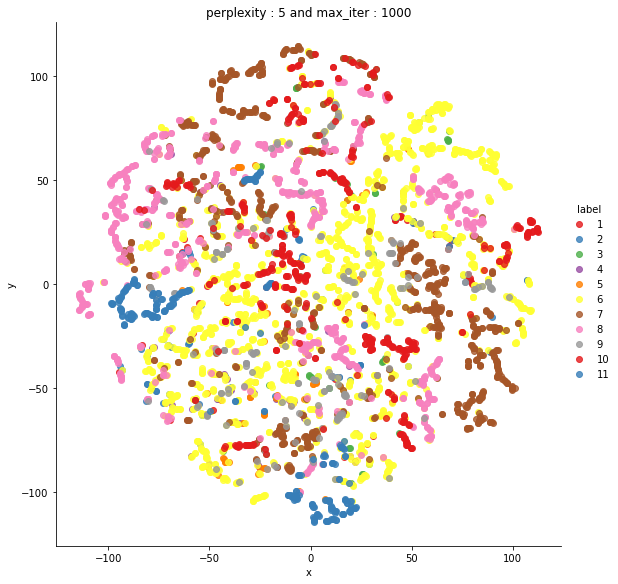

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 4391 samples in 0.375s...
[t-SNE] Computed neighbors for 4391 samples in 4.248s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4391
[t-SNE] Computed conditional probabilities for sample 2000 / 4391
[t-SNE] Computed conditional probabilities for sample 3000 / 4391
[t-SNE] Computed conditional probabilities for sample 4000 / 4391
[t-SNE] Computed conditional probabilities for sample 4391 / 4391
[t-SNE] Mean sigma: 23069845.788319
[t-SNE] Computed conditional probabilities in 0.256s
[t-SNE] Iteration 50: error = 96.0834427, gradient norm = 0.0626226 (50 iterations in 1.210s)
[t-SNE] Iteration 100: error = 81.7857819, gradient norm = 0.0159144 (50 iterations in 0.926s)
[t-SNE] Iteration 150: error = 78.0584564, gradient norm = 0.0137082 (50 iterations in 0.891s)
[t-SNE] Iteration 200: error = 76.0562744, gradient norm = 0.0083601 (50 iterations

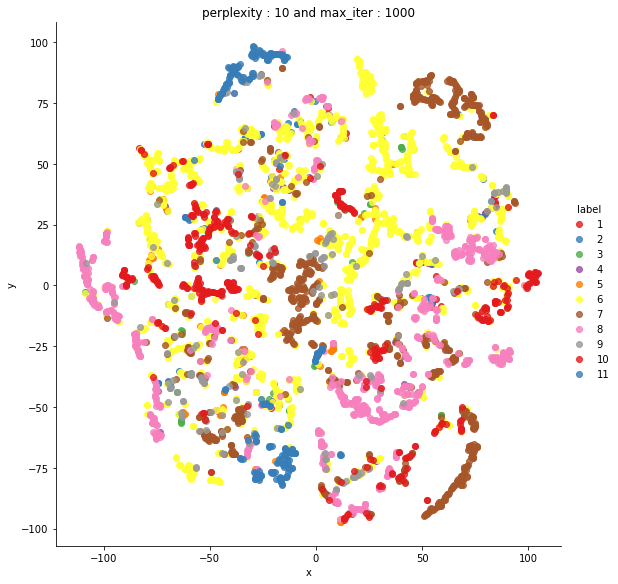

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 4391 samples in 0.381s...
[t-SNE] Computed neighbors for 4391 samples in 5.544s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4391
[t-SNE] Computed conditional probabilities for sample 2000 / 4391
[t-SNE] Computed conditional probabilities for sample 3000 / 4391
[t-SNE] Computed conditional probabilities for sample 4000 / 4391
[t-SNE] Computed conditional probabilities for sample 4391 / 4391
[t-SNE] Mean sigma: 24144850.986344
[t-SNE] Computed conditional probabilities in 0.502s
[t-SNE] Iteration 50: error = 86.1454163, gradient norm = 0.0507407 (50 iterations in 1.387s)
[t-SNE] Iteration 100: error = 74.7001190, gradient norm = 0.0104890 (50 iterations in 1.032s)
[t-SNE] Iteration 150: error = 72.4276810, gradient norm = 0.0070277 (50 iterations in 1.027s)
[t-SNE] Iteration 200: error = 71.3663101, gradient norm = 0.0051341 (50 iterations

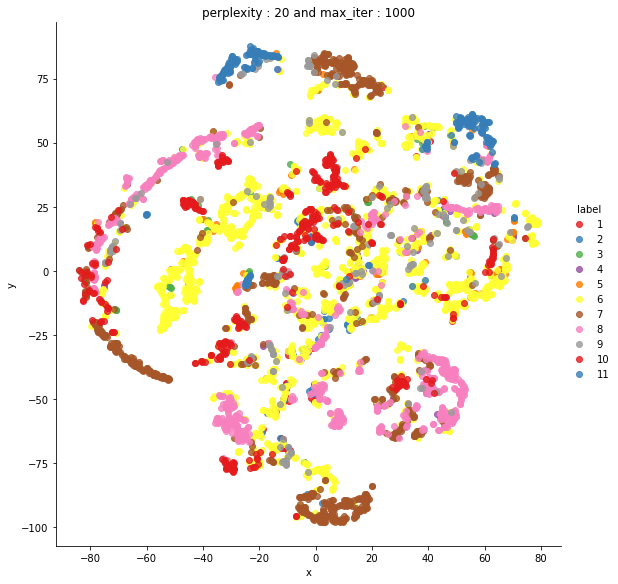

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 4391 samples in 0.379s...
[t-SNE] Computed neighbors for 4391 samples in 8.758s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4391
[t-SNE] Computed conditional probabilities for sample 2000 / 4391
[t-SNE] Computed conditional probabilities for sample 3000 / 4391
[t-SNE] Computed conditional probabilities for sample 4000 / 4391
[t-SNE] Computed conditional probabilities for sample 4391 / 4391
[t-SNE] Mean sigma: 25689296.966663
[t-SNE] Computed conditional probabilities in 1.243s
[t-SNE] Iteration 50: error = 76.2129211, gradient norm = 0.0454345 (50 iterations in 1.517s)
[t-SNE] Iteration 100: error = 66.3315582, gradient norm = 0.0095168 (50 iterations in 1.346s)
[t-SNE] Iteration 150: error = 65.0552368, gradient norm = 0.0058161 (50 iterations in 1.273s)
[t-SNE] Iteration 200: error = 64.2271729, gradient norm = 0.0052541 (50 iteration

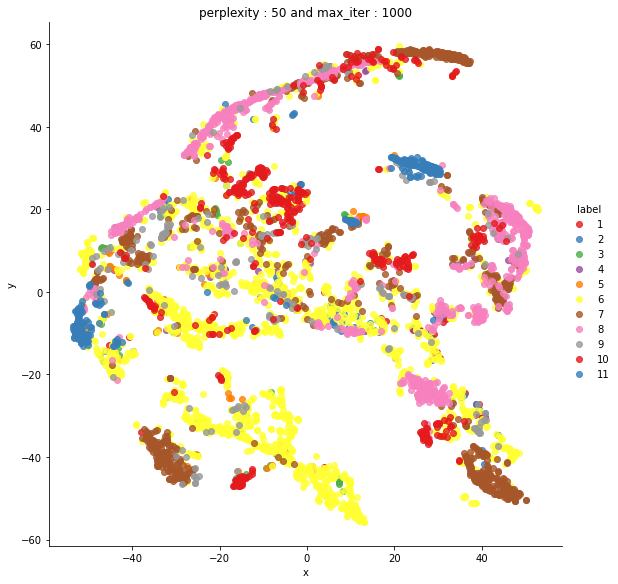

Done


In [54]:
X_pre_tsne = xt
y_pre_tsne = yt
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

In [55]:
xtrain=np.expand_dims(xtrain,axis=2)
xtest=np.expand_dims(xtest,axis=2)
print(xtrain.shape)

(10913, 756, 1)


In [56]:
ytrain, ytest = target[:train_size], target[train_size:len(dataset)]
ytrain

,1,2,3,4,5,6,7,8,9,10,11
1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10909,0,0,0,0,0,0,0,0,0,0,1
10910,0,0,0,0,0,0,0,0,0,0,1
10911,0,0,0,0,0,0,0,0,0,0,1
10912,0,0,0,0,0,0,0,0,0,0,1


In [57]:
look_back=10
ytrain = ytrain.to_numpy()
ytest = ytest.to_numpy()

In [58]:
train_data_gen = TimeseriesGenerator(xtrain,ytrain,length=look_back, sampling_rate=1,stride=1,batch_size=11)
test_data_gen = TimeseriesGenerator(xtest, ytest,length=look_back, sampling_rate=1,stride=1,batch_size=11)

In [59]:
# look_back=18
#print(ytrain)

#print(ytrain)

In [60]:
input1,target1 = train_data_gen[0]
print(target1)
print(input1)
print(input1.shape)
print(len(train_data_gen))
print(train_data_gen)

[[1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]]
[[[[1.87559715e-01]
   [8.26006295e-03]
   [3.06714000e-01]
   ...
   [8.18594104e-01]
   [0.00000000e+00]
   [1.87084651e-15]]

  [[1.93717218e-01]
   [1.46843500e-01]
   [3.01078072e-01]
   ...
   [4.14965986e-01]
   [0.00000000e+00]
   [3.21251184e-01]]

  [[3.52898929e-01]
   [6.72606161e-01]
   [2.76978945e-01]
   ...
   [7.65306122e-02]
   [0.00000000e+00]
   [4.93104174e-01]]

  ...

  [[2.09704397e-01]
   [2.91128924e-01]
   [3.08680752e-01]
   ...
   [0.00000000e+00]
   [9.11396122e-01]
   [0.00000000e+00]]

  [[4.33456309e-01]
   [6.48003210e-01]
   [2.03843918e-01]
   ...
   [0.00000000e+00]
   [9.15619894e-01]
   [0.00000000e+00]]

  [[5.82841128e-01]
   [3.85038849e-01]
   [6.17899640e-02]
   ...
   [0

In [61]:
filters = 250
kernel_size = 7
hidden_dims = 100

In [67]:
from keras.models import Model
from keras.constraints import max_norm

In [68]:
input=Input(shape=(10,756,1))
input_features=TimeDistributed(Conv1D(250,3,strides=1,padding='valid',use_bias=True,activation='relu',
                    kernel_initializer='glorot_uniform',kernel_regularizer=l2(0.02)))(input)
# input_feat=TimeDistributed(Conv1D(64,3,activation='relu'))(input_features)
input_features=TimeDistributed(Dropout(0.25))(input_features)
maxpool=TimeDistributed(MaxPooling1D(pool_size=2))(input_features)
input_features=TimeDistributed(Flatten())(maxpool)
lstm=LSTM(32,activation="tanh",
    recurrent_activation="sigmoid",
    use_bias=True,
    kernel_initializer="he_normal",
#     recurrent_initializer="orthogonal",
    bias_initializer="zeros",
    unit_forget_bias=True,
    kernel_regularizer=l2(0.02),
    recurrent_regularizer=l2(0.02),
    bias_regularizer=l2(0.02),
#     activity_regularizer=None,
    kernel_constraint=max_norm(1.0),
    recurrent_constraint=max_norm(1.0),
    bias_constraint=max_norm(1.0),
#     dropout=0.2,
#     recurrent_dropout=0.2,
    return_sequences=True,
    return_state=False,
    go_backwards=False)(input_features)

bn=TimeDistributed(BatchNormalization())(lstm)
bn=TimeDistributed(Dropout(0.25))(bn)
fc1=TimeDistributed(Dense(128,kernel_initializer='he_normal',bias_regularizer=l2(0.02),
                          kernel_regularizer=l2(0.02),activation='relu'))(bn)
bn1=TimeDistributed(BatchNormalization())(fc1)
drop=TimeDistributed(Dropout(0.25))(bn1)
fc2=TimeDistributed(Dense(64,kernel_initializer='he_normal',
                          activation='relu'))(drop)
bn2=TimeDistributed(BatchNormalization())(fc2)
drop1=TimeDistributed(Dropout(0.25))(bn2)
drop2=Flatten()(drop1)
outputs=Dense(11,kernel_initializer='he_normal',bias_initializer="zeros",
                          activation='softmax')(drop2)
model=Model(inputs=input,outputs=outputs)

# model.compile(optimizer='RMSprop',loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 10, 756, 1)        0         
_________________________________________________________________
time_distributed_25 (TimeDis (None, 10, 754, 250)      1000      
_________________________________________________________________
time_distributed_26 (TimeDis (None, 10, 754, 250)      0         
_________________________________________________________________
time_distributed_27 (TimeDis (None, 10, 377, 250)      0         
_________________________________________________________________
time_distributed_28 (TimeDis (None, 10, 94250)         0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 10, 32)            12068224  
_________________________________________________________________
time_distributed_29 (TimeDis (None, 10, 32)            128 

In [64]:
# input=Input(shape=(20,32,1))
# input_features=TimeDistributed(Conv1D(64,3,strides=1,padding='valid',use_bias=True,activation='relu',
#                     kernel_initializer='glorot_uniform',kernel_regularizer=l2(0.02),bias_regularizer=l2(0.02)))(input)
# input_features=TimeDistributed(Dropout(0.25))(input_features)
# input_features=TimeDistributed(Flatten())(input_features)
# lstm=LSTM(32,activation="tanh",
#     recurrent_activation="hard_sigmoid",
#     use_bias=True,
#     kernel_initializer="he_normal",
#     recurrent_initializer="orthogonal",
#     bias_initializer="zeros",
#     unit_forget_bias=True,
#     kernel_regularizer=l2(0.02),
#     recurrent_regularizer=l2(0.02),
#     bias_regularizer=l2(0.02),
#     activity_regularizer=None,
#     kernel_constraint=max_norm(1.0),
#     recurrent_constraint=max_norm(1.0),
#     bias_constraint=max_norm(1.0),
#     dropout=0.25,
#     recurrent_dropout=0.25,
#     return_sequences=True,
#     return_state=False,
#     go_backwards=False)(input_features)
# bn=TimeDistributed(BatchNormalization())(lstm)
# bn=TimeDistributed(Dropout(0.25))(bn)
# fc1=TimeDistributed(Dense(128,kernel_initializer='he_normal',bias_regularizer=l2(0.02),
#                           kernel_regularizer=l2(0.02),activation='relu'))(bn)
# bn1=TimeDistributed(BatchNormalization())(fc1)
# drop=TimeDistributed(Dropout(0.25))(bn1)
# fc2=TimeDistributed(Dense(64,kernel_initializer='he_normal',bias_regularizer=l2(0.02),
#                           kernel_regularizer=l2(0.02),activation='relu'))(drop)
# bn2=TimeDistributed(BatchNormalization())(fc2)
# drop1=TimeDistributed(Dropout(0.25))(bn2)
# drop2=Flatten()(drop1)
# outputs=Dense(11,kernel_initializer='he_normal',bias_regularizer=l2(0.02),bias_initializer="zeros",
#                           kernel_regularizer=l2(0.02),activation='softmax')(drop2)
# model=Model(inputs=input,outputs=outputs)

# # model.compile(optimizer='RMSprop',loss='categorical_crossentropy',metrics=['accuracy'])
# print(model.summary())


In [69]:
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau

In [ ]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback =ModelCheckpoint(
    filepath='model.{epoch:02d}-{val_loss:.2f}.h5',
    save_weights_only=False,
    monitor='loss',
    mode='min',
    save_best_only=True)
# reduced_lr=ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
#                               patience=5, min_lr=1e-4)

model.compile(loss='categorical_crossentropy', optimizer='nadam',metrics=['accuracy'])
model.fit_generator(train_data_gen, epochs=25,verbose=1,validation_data=test_data_gen,callbacks=[model_checkpoint_callback])
# model.fit(xtrain,ytrain, epochs=5,verbose=1,validation_data=(xtest,ytest),callbacks=[model_checkpoint_callback])


Epoch 1/25
992/992 [==============================] - 941s 949ms/step - loss: 5.2314 - accuracy: 0.2013 - val_loss: 15.8165 - val_accuracy: 0.0975
Epoch 2/25
992/992 [==============================] - 892s 899ms/step - loss: 3.0422 - accuracy: 0.3363 - val_loss: 15.9870 - val_accuracy: 0.0251
Epoch 3/25
992/992 [==============================] - 859s 866ms/step - loss: 2.1788 - accuracy: 0.5076 - val_loss: 3.1111 - val_accuracy: 0.2031
Epoch 4/25
992/992 [==============================] - 867s 874ms/step - loss: 1.7346 - accuracy: 0.6104 - val_loss: 6.9526 - val_accuracy: 0.2001
Epoch 5/25
992/992 [==============================] - 854s 861ms/step - loss: 1.4235 - accuracy: 0.7097 - val_loss: 6.8969 - val_accuracy: 0.1784
Epoch 6/25
992/992 [==============================] - 892s 899ms/step - loss: 1.2370 - accuracy: 0.7547 - val_loss: 7.1476 - val_accuracy: 0.2421
Epoch 7/25
992/992 [==============================] - 873s 880ms/step - loss: 1.0618 - accuracy: 0.7924 - val_loss: 6.7027